# Exercise 6, answers

## Problem 1

In [8]:
from pyomo.environ import *

model = ConcreteModel()
#Three variables
model.x = Var([1,2,3])
#Objective function including powers and logarithm
model.OBJ = Objective(expr = log(model.x[1]**2+1)+model.x[2]**4
                      +model.x[1]*model.x[3]) #Objective function
model.constr = Constraint(expr = model.x[1]**3-model.x[2]**2>=1)
model.box1 = Constraint(expr = model.x[1]>=0)
model.box2 = Constraint(expr = model.x[3]>=0)

from pyomo.opt import SolverFactory #Import interfaces to solvers

opt = SolverFactory("ipopt") #Use ipopt

res = opt.solve(model, tee=True) #Solve the  problem and print the output

print "Optimal solutions is "
model.x.display()
print "Objective value at the optimal solution is "
model.OBJ.display()



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Common Public License (CPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.5.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                

## Problem 2

The set Pareto optimal solutions is $\{(t,1-t):t\in[0,1]\}$.

Let us denote set of Pareto optimal solutions by $PS$ and show that $PS=\{(t,1-t):t\in[0,1]\}$.

$PS\supset\{(t,1-t):t\in[0,1]\}$:

Let's assume that there exists $t\in[0,1]$, which is not Pareto optimal. Then there exists $x=(x_1,x_2)\in\mathbb R^2$ and $t\in[0,1]$ such that
$$
\left\{
\begin{align}
\|x-(1,0)\|^2<\|(t,1-t)-(1,0) \|^2,\text{ and}\\
\|x-(0,1)\|^2\leq\|(t,1-t)-(0,1) \|^2
\end{align}
\right.
$$
or
$$
\left\{
\begin{align}
\|x-(1,0)\|^2\leq\|(t,1-t)-(1,0) \|^2,\text{ and}\\
\|x-(0,1)\|^2<\|(t,1-t)-(0,1)\|^2.
\end{align}
\right.
$$

But in both cases

$$
\sqrt{2} = \|(1,0)-(0,1)\|\\
\leq \|(1,0)-x\|+\|x-(0,1)\|\\
< \|(t,1-t)-(1,0) \|+\|(t,1-t)-(0,1) \|\\
= \|(1,0)-(0,1)\| =\sqrt{2}.
$$
because the point $(t,1-t)$ is on the straight line from $(1,0)$ to $(0,1)$.

Thus, neither one of the requirements of non-Pareto optimality can hold. Thus, the point is Pareto optimal.

$PS\subset\{(t,1-t):t\in[0,1]\}$:

Let's assume a Pareto optimal solution $x$. This follows from the triangle inequality.

## Problem 3

Ideal:

To solve
$$
\min \|x-(1,0)\|^2\\
\text{s.t. }x\in \mathbb R^2.
$$
The solution of this problem is naturally $x = (1,0)$ and the minimum is $0$. Minimizing the second objective give $x=(0,1)$ and the minimum is again $0$. Thus, the ideal is $(0,0)$.

Now, the problem has just two objectives and thus, we get the components of the nadir by optimizing
$$
\min f_1(x)\\
\text{s.t. }f_2(x)\leq z^{ideal}_2
$$
and
$$
\min f_2(x)\\
\text{s.t. }f_1(x)\leq z^{ideal}_1.
$$

The solution of this problem is Pareto optimal because of the epsilon constraint method and also because the other one of the objectives is at the minimum and the other one cannot be grown with growing the other. Thus, the components of the nadir are at least the optimal values of the above optimization problems.

On the other hand, the components of the nadir have to be at most the optimal values of the above optimization problems, because if this was not the case, then the solution would not be Pareto optimal.

By solving these optimization problems, we get nadir (2,2).

## Problem 4

In [9]:
def prob(x):
    return [(x[0]-1)**2+x[1]**2,x[0]**2+(x[1]-1)**2]

Let's do this using Pyomo:

In [10]:
from pyomo.environ import *
from pyomo.opt import SolverFactory #Import interfaces to solvers

def weighting_method_pyomo(f,w):
    points = []
    for wi in w:
        model = ConcreteModel()
        model.x = Var([0,1])
        #weighted sum
        model.obj = Objective(expr = wi[0]*f(model.x)[0]+wi[1]*f(model.x)[1])
        opt = SolverFactory("ipopt") #Use ipopt
        #Combination of expression and function
        res=opt.solve(model) #Solve the problem
        points.append([model.x[0].value,model.x[1].value]) #We should check for optimality...
    return points

In [11]:
import numpy as np
w = np.random.random((500,2)) #500 random weights
repr = weighting_method_pyomo(prob,w)

**Plot the solutions in the objective space**

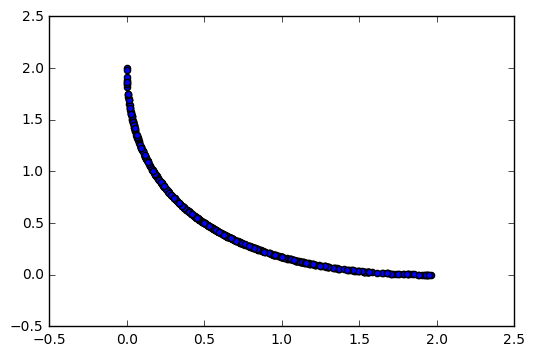

In [13]:
import matplotlib.pyplot as plt
f_repr_ws = [prob(repri) for repri in repr]
fig = plt.figure()
plt.scatter([z[0] for z in f_repr_ws],[z[1] for z in f_repr_ws])
plt.show()

**Plot the solutions in the decision space**

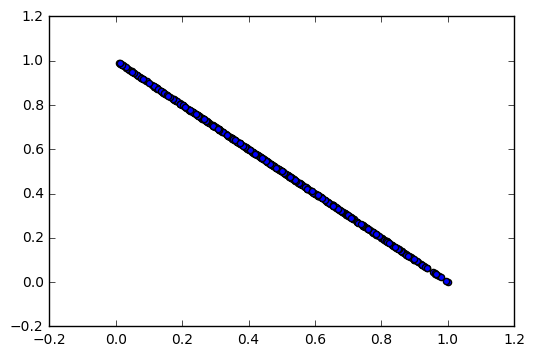

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter([x[0] for x in repr],[x[1] for x in repr])
plt.show()

**What do we notice?**

In this problem, the weighting method works. This is because the objective functions are convex.

Working here means that the method produces an even representation of the whole Pareto optimal set.